# Problem statemen

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to the "status" column which is set to 0 for healthy and 1 for PD

I used this dataset to experiment with feature selection techniques, specifically filter methods. Consequently, I skipped data cleaning and exploratory data analysis. My objective is to assess whether feature selection can improve model performance.

The goal is to create a machine learning model that can predict whether a patient is likely to have Parkinson's disease based on biomedical voice measurements.

Data source: https://www.kaggle.com/datasets/vikasukani/parkinsons-disease-data-set/data


List of features:

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR, HNR - Two measures of the ratio of noise to tonal components in the voice

status - The health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE, D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

## Workflow

1. Train the model using all the features (22). I used logistic regression to train the model. 
2. Evaluate the model performance . The evaluation scores are called baseline evaluation
3. Feature selection using filter methods
4. Train a second model called final model using all the selected features using the same data split (random state)
5. Evaluate the model performance . The evaluation scores are called final evaluation
6. Compare the perdormance of two models


## Feature selectio using filter methods: They are focus on intrinsic properties of features

•	Correlation with target

•	Pairwise correlation

•	Variance threshold




In [192]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")




In [193]:
from sklearn.model_selection import train_test_split


In [194]:
# from sklearn.feature_selection import VarianceThreshold
# def variance_threshold(data,threshold=0.2):
#     var_thres = VarianceThreshold(threshold)
#     var_thres.fit(data_pd)
#     new_cols = var_thres.get_support()#retrieves a boolean array indicating which features satisfy the condition of having a variance greater than the threshold
#     return data_pd.iloc[:,new_cols]# returning a new DataFrame containing only the features that passed the variance threshold
# variance_threshold(data_pd, 0.1)s


In [195]:
df = pd.read_csv("./data/Parkinsson disease.csv")
label_pd = df["status"]
# Remove the "status" and "name" columns from the DataFrame to create the feature matrix
x = df.drop(["status", "name"], axis=1)


In [196]:
label_pd.info()

<class 'pandas.core.series.Series'>
RangeIndex: 195 entries, 0 to 194
Series name: status
Non-Null Count  Dtype
--------------  -----
195 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


In [197]:
x.head()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [198]:
## Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(x,label_pd,test_size=0.25, random_state=42)

## 1-Training the Model with LogisticRegression_Baseline model

In [225]:
from sklearn.linear_model import LogisticRegression
Logistic_R=LogisticRegression(max_iter = 1000)
Logistic_R.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [226]:
Logistic_R.coef_

array([[-6.65892241e-03, -4.75410799e-03, -2.64949133e-03,
        -5.96437635e-04, -1.62613092e-05,  3.28497441e-03,
         1.51867167e-03,  9.84927336e-03,  4.14077327e-02,
         4.29460853e-01,  1.64106159e-02,  2.90685059e-02,
         4.10220296e-02,  4.91849358e-02,  4.24067620e-04,
        -7.37880075e-03, -4.24553926e-01,  1.21963789e-01,
         1.46183704e+00,  2.64801851e-01,  1.73571489e+00,
         1.74283318e-01]])

In [227]:
# Transpose the coefficients array
coefficients = Logistic_R.coef_.T

# Create the DataFrame with the transposed coefficients
cdf = pd.DataFrame(coefficients, index=x.columns, columns=['Coef'])

# Print the DataFrame
print(cdf)

                      Coef
MDVP:Fo(Hz)      -0.006659
MDVP:Fhi(Hz)     -0.004754
MDVP:Flo(Hz)     -0.002649
MDVP:Jitter(%)   -0.000596
MDVP:Jitter(Abs) -0.000016
MDVP:RAP          0.003285
MDVP:PPQ          0.001519
Jitter:DDP        0.009849
MDVP:Shimmer      0.041408
MDVP:Shimmer(dB)  0.429461
Shimmer:APQ3      0.016411
Shimmer:APQ5      0.029069
MDVP:APQ          0.041022
Shimmer:DDA       0.049185
NHR               0.000424
HNR              -0.007379
RPDE             -0.424554
DFA               0.121964
spread1           1.461837
spread2           0.264802
D2                1.735715
PPE               0.174283


## 2-Making predictions_Baseline model

In [228]:
predictions = Logistic_R.predict(X_test)

## 3-Model Evaluation_Baseline model
 
Score: Accuracy

In [229]:
#model evaluation
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score, f1_score, accuracy_score
import numpy as np 
from sklearn .metrics import roc_auc_score #ROC and AUC
# print("Precision:", precision_score(Y_test,predictions, average="weighted"))
# print("Recall:", recall_score(Y_test,predictions, average="weighted"))
# print("Accuracy:", accuracy_score(Y_test,predictions))
# print('F1 score:', f1_score(Y_test,predictions, average="weighted")) 
# # accuracy_score(Y_test,predictions)

precision_score_baseline=precision_score(Y_test,predictions, average="weighted")
recall_score_baseline=recall_score(Y_test,predictions, average="weighted")
accuracy_score_baseline=accuracy_score(Y_test,predictions)
F1_score_baseline=f1_score(Y_test,predictions, average="weighted")
auc_baseline=roc_auc_score(Y_test,predictions)


In [230]:
x.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.024081,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.016947,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.013080,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.018260,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.029400,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


## 4-Feature selection 

I used 3 methods below for feature selection:

•	Correlation with target

•	Pairwise correlation (Multicollinearity)

•	Variance threshold


**Step 1: Variance threshold**

Features with higher variance may potentially contain more valuable information, as they demonstrate a wider range of values across the dataset, suggesting diversity or differentiation among data points.

To assess the variability of features in the dataset, I calculated the Coefficient of Variation (COV) for each feature. COV, expressed as a percentage, indicates the relative variability of a feature by comparing its standard deviation to its mean. A lower COV suggests that most data points are clustered closely around the mean, indicating low variability, while a higher COV implies greater dispersion of values.

I identified features with a COV of less than 15% as potential candidates for removal. 

In [231]:

# Calculate the variance and mean of each feature
variance_per_feature = x.var()
mean_per_feature = x.mean()
# Calculate the coefficient of variation for each feature
coefficient_of_variation = (x.std() / x.mean()) * 100
# Combine the variance, mean, and coefficient of variation into a DataFrame
stats_df = pd.DataFrame({'Mean': mean_per_feature, 'Variance': variance_per_feature, 'Coefficient of Variation': coefficient_of_variation})
stats_df.head(30)

,Mean,Variance,Coefficient of Variation
MDVP:Fo(Hz),154.228641,1.713137e+03,26.836821
MDVP:Fhi(Hz),197.104918,8.370703e+03,46.417689
MDVP:Flo(Hz),116.324631,1.894113e+03,37.413756
MDVP:Jitter(%),0.006220,2.350440e-05,77.938488
MDVP:Jitter(Abs),0.000044,1.212565e-09,79.214561
MDVP:RAP,0.003306,8.807685e-06,89.758203
MDVP:PPQ,0.003446,7.611952e-06,80.054825
Jitter:DDP,0.009920,7.926954e-05,89.751919
MDVP:Shimmer,0.029709,3.555839e-04,63.471845
MDVP:Shimmer(dB),0.282251,3.797716e-02,69.043899


In [232]:
# # Calculate the z-score for each feature
# standardized_x = (x - x.mean()) / x.std()
# standardized_x.head(5)


**Insights from Variance threshold**

There are two potential candidates with the smallest COV 

 (DFA) feature with COV of 7.8%


 D2 feature with COV of 16% 


**Step 2: Pairwise correlation**

I conducted pairwise correlation analysis to assess the relationships between pairs of variables in the dataset. The primary objectives were : addressing multicollinearity and eliminating redundancy.

 -Multicollinearity: Multicollinearity occurs when two or more features in the dataset are highly correlated, posing challenges for models that assume feature independence (regression). So we don't want to have two features that are dependent (highly correlated) in our data set.

-Redundancy: Removing highly correlated or redundant features can enhance the performance of our models. Redundant features provide redundant information and do not contribute unique insights to the prediction process

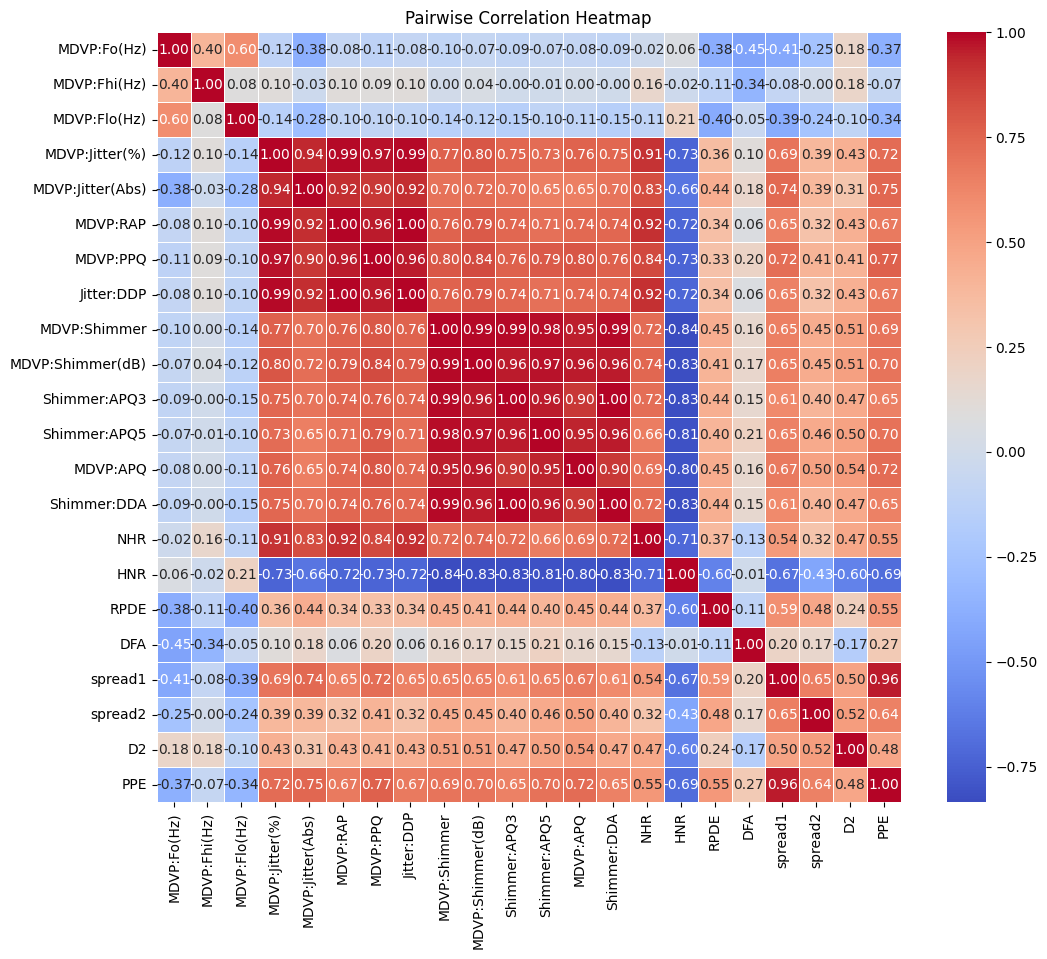

In [233]:
# Calculate pairwise correlation matrix
correlation_matrix = x.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pairwise Correlation Heatmap')
plt.show()

**Insights from pairwise correlation**

-Very strong positive correlation (90% to 100%)  between the following features: 
MDVP:Jitter (%)
MDVP:Jitter(Abs)   
MDVP:RAP            
MDVP:PPQ  
Jitter:DDP   
NHR

-Also very strong positive correlation (90% t0 100%)  between the features below:

MDVP:Shimmer

MDVP:Shimmer(dB)

Shimmer:APQ3

Shimmer:APQ5

MDVP:APQ    

Shimmer:DDA

-The same features have a strong negative correlation with HNR


-HNR also has a strong negative correlation (70-73%) with the features below:

MDVP:Jitter (%)
MDVP:Jitter(Abs)   
MDVP:RAP            
MDVP:PPQ  
Jitter:DDP   



**Step 3: Correlation of each feature with target**

Goal: Finding the features that are highly correlated with the target variable

Note: since all the features are continuous variables and the target value is a binary variable (0,1), we better use Point-biserial correlation vs Pearson correlation. Here is why form chatgpt:

Pearson correlation coefficient assumes that both variables are continuous and that they have a linear relationship. When one of the variables is binary (dichotomous), these assumptions might not hold true. However, in some cases where the binary variable can be treated as a continuous variable (e.g., coded as 0 and 1), Pearson correlation might still provide meaningful insights.

However, when you have one binary variable and one continuous variable, the **point-biserial** correlation coefficient is specifically designed to handle this scenario and is usually preferred over Pearson correlation. It considers the dichotomous variable as a special case of a continuous variable.

While Pearson correlation can technically be calculated between a continuous and a binary variable, it might not accurately capture the nature of their relationship, especially if it's not linear. So, it's generally recommended to use point-biserial correlation coefficient when one of the variables is binary.

In [208]:

# # Pearson correlation
# # Concatenate the feature DataFrame(x) and the target variable DataFrame(label_pd) along the columns axis
# merged_data = pd.concat([x, label_pd], axis=1)

# # Calculate the correlation of each feature with the target variable
# correlation_with_target = merged_data.corr().iloc[:-1, -1]

# # Display the correlation of each feature with the target variable
# print("Correlation of each feature with the target variable:")
# print(correlation_with_target)

In [234]:
import scipy.stats

# Assuming label_pd is your binary target variable and data_pd is your feature DataFrame

# Calculate point-biserial correlation coefficient for each feature
point_biserial_correlation = x.apply(lambda x: scipy.stats.pointbiserialr(x, label_pd)[0])

# Display the point-biserial correlation coefficients
print("Point-Biserial Correlation Coefficients:")
print(point_biserial_correlation)

Point-Biserial Correlation Coefficients:
MDVP:Fo(Hz)        -0.383535
MDVP:Fhi(Hz)       -0.166136
MDVP:Flo(Hz)       -0.380200
MDVP:Jitter(%)      0.278220
MDVP:Jitter(Abs)    0.338653
MDVP:RAP            0.266668
MDVP:PPQ            0.288698
Jitter:DDP          0.266646
MDVP:Shimmer        0.367430
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:APQ5        0.351148
MDVP:APQ            0.364316
Shimmer:DDA         0.347608
NHR                 0.189429
HNR                -0.361515
RPDE                0.308567
DFA                 0.231739
spread1             0.564838
spread2             0.454842
D2                  0.340232
PPE                 0.531039
dtype: float64


**Insights from correlation with target**

`spread1` has the highest correlation with target variable with : 0.564838

`PPE` and `spread2` have the highest correlation after spread1 with 0.53 and .45 respectively


**Conclusion**:

-Removing `DFA` and `D2` since they have the smallest COV and have no correaltion with the target variable

-Removing features listed below since they have very strong positive pairwise correlation (90% to 100%) among themselves (redundancy and multicollinearity): 

MDVP:RAP            
MDVP:PPQ  
Jitter:DDP   
NHR
MDVP:Jitter (%)

**MDVP:Jitter(Abs)**: I only keep this one that has the highest correlation with the target variable (0.338653) within the group.

-Removing features listed below since they have very strong positive pairwise correlation (90% to 100%) among themselves (redundancy and multicollinearity): 


MDVP:Shimmer(dB)    
Shimmer:APQ3        
Shimmer:APQ5        
MDVP:APQ            
Shimmer:DDA 
HNR        

**MDVP:Shimmer**: I only keep this one that has the highest correlation with the target variable (0.3367) within the group. 

**Final list of features** and their correlation with target variable:

MDVP:Fo(Hz)        -0.383535

MDVP:Fhi(Hz)       -0.166136

MDVP:Flo(Hz)       -0.380200

MDVP:Jitter(%)      0.278220

MDVP:Jitter(Abs)    0.338653

MDVP:Shimmer        0.367430

RPDE                0.308567

spread1             0.564838

spread2             0.454842

PPE                 0.531039

# 5-Training the model using new features 

## Data split

 Data split must be done before feature selection to avoid data leakage 
 
x variable represents the initial list of features before feature selection that we used to create the baseline model. x includes all the columns except for target (status) and (name). It includes 195 rows and 22 columns.  

In [210]:
X_train, X_test, Y_train, Y_test = train_test_split(x,label_pd,test_size=0.25, random_state=42)
# we used the same random state to get the same split as based model and to compare the results with the same data.  

In [211]:
X_train

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
65,228.969,239.541,113.201,0.00238,0.00001,0.00136,0.00140,0.00408,0.01745,0.154,...,0.01234,0.02827,0.00420,24.547,0.305429,0.681811,-7.314237,0.006274,2.118596,0.091546
104,154.003,160.267,128.621,0.00183,0.00001,0.00076,0.00100,0.00229,0.01030,0.094,...,0.00871,0.01406,0.00243,28.409,0.263654,0.691483,-7.111576,0.144780,2.065477,0.093193
159,127.930,138.752,112.173,0.00605,0.00005,0.00321,0.00318,0.00962,0.03235,0.339,...,0.03105,0.04079,0.02663,19.651,0.654945,0.675865,-5.498456,0.234196,2.103014,0.216638
78,95.385,102.145,90.264,0.00608,0.00006,0.00331,0.00332,0.00994,0.03202,0.263,...,0.02455,0.05408,0.01062,21.875,0.644954,0.779612,-5.115212,0.249494,2.017753,0.260015
76,112.876,148.826,106.981,0.00500,0.00004,0.00270,0.00289,0.00810,0.03999,0.350,...,0.02704,0.07238,0.00905,23.370,0.489538,0.789977,-5.775966,0.341169,2.007923,0.193918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,155.078,163.736,144.148,0.00168,0.00001,0.00068,0.00092,0.00204,0.01064,0.097,...,0.00928,0.01567,0.00233,29.746,0.334171,0.677930,-6.981201,0.184550,2.129924,0.106802
14,152.845,163.305,75.836,0.00294,0.00002,0.00121,0.00149,0.00364,0.01828,0.158,...,0.01246,0.03191,0.00609,24.922,0.474791,0.654027,-6.105098,0.203653,2.125618,0.170100
92,148.272,164.989,142.299,0.00459,0.00003,0.00250,0.00256,0.00750,0.04190,0.383,...,0.03051,0.07150,0.01914,18.780,0.454444,0.734504,-5.952058,0.087840,2.344336,0.186489
179,148.143,155.982,135.041,0.00392,0.00003,0.00204,0.00231,0.00612,0.01450,0.131,...,0.01263,0.02175,0.00540,23.683,0.398499,0.778349,-5.711205,0.240875,2.845109,0.192730


In [212]:
# Show all the features included in the X_train DataFrame before feature selection
X_train.columns      

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [213]:
X_train

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
65,228.969,239.541,113.201,0.00238,0.00001,0.00136,0.00140,0.00408,0.01745,0.154,...,0.01234,0.02827,0.00420,24.547,0.305429,0.681811,-7.314237,0.006274,2.118596,0.091546
104,154.003,160.267,128.621,0.00183,0.00001,0.00076,0.00100,0.00229,0.01030,0.094,...,0.00871,0.01406,0.00243,28.409,0.263654,0.691483,-7.111576,0.144780,2.065477,0.093193
159,127.930,138.752,112.173,0.00605,0.00005,0.00321,0.00318,0.00962,0.03235,0.339,...,0.03105,0.04079,0.02663,19.651,0.654945,0.675865,-5.498456,0.234196,2.103014,0.216638
78,95.385,102.145,90.264,0.00608,0.00006,0.00331,0.00332,0.00994,0.03202,0.263,...,0.02455,0.05408,0.01062,21.875,0.644954,0.779612,-5.115212,0.249494,2.017753,0.260015
76,112.876,148.826,106.981,0.00500,0.00004,0.00270,0.00289,0.00810,0.03999,0.350,...,0.02704,0.07238,0.00905,23.370,0.489538,0.789977,-5.775966,0.341169,2.007923,0.193918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,155.078,163.736,144.148,0.00168,0.00001,0.00068,0.00092,0.00204,0.01064,0.097,...,0.00928,0.01567,0.00233,29.746,0.334171,0.677930,-6.981201,0.184550,2.129924,0.106802
14,152.845,163.305,75.836,0.00294,0.00002,0.00121,0.00149,0.00364,0.01828,0.158,...,0.01246,0.03191,0.00609,24.922,0.474791,0.654027,-6.105098,0.203653,2.125618,0.170100
92,148.272,164.989,142.299,0.00459,0.00003,0.00250,0.00256,0.00750,0.04190,0.383,...,0.03051,0.07150,0.01914,18.780,0.454444,0.734504,-5.952058,0.087840,2.344336,0.186489
179,148.143,155.982,135.041,0.00392,0.00003,0.00204,0.00231,0.00612,0.01450,0.131,...,0.01263,0.02175,0.00540,23.683,0.398499,0.778349,-5.711205,0.240875,2.845109,0.192730


X_train variable represents the initial list of features before feature selection that we used to create the baseline model. X_train includes all the columns except for target (status) and (name). It includes 146 (75% of data)rows and 22 columns. 

**Define new training set after split using feature selection**

In [214]:
# Drop the features from the X_train data set based on the feature selection conclusion to create a new feature matrix

X_train_selected=X_train[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:Shimmer', 'RPDE', 'spread1', 'spread2','PPE']]
X_test_selected=X_test[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:Shimmer', 'RPDE', 'spread1', 'spread2','PPE']]
X_train_selected.info     

#X_train_selected variable represents the  list chosen features after feature selection. It includes 146 rows and 10 columns. 

<bound method DataFrame.info of      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
65       228.969       239.541       113.201         0.00238   
104      154.003       160.267       128.621         0.00183   
159      127.930       138.752       112.173         0.00605   
78        95.385       102.145        90.264         0.00608   
76       112.876       148.826       106.981         0.00500   
..           ...           ...           ...             ...   
106      155.078       163.736       144.148         0.00168   
14       152.845       163.305        75.836         0.00294   
92       148.272       164.989       142.299         0.00459   
179      148.143       155.982       135.041         0.00392   
102      139.224       586.567        66.157         0.03011   

     MDVP:Jitter(Abs)  MDVP:Shimmer      RPDE   spread1   spread2       PPE  
65            0.00001       0.01745  0.305429 -7.314237  0.006274  0.091546  
104           0.00001       0.01030  0.2636

In [215]:
Y_train.info()

<class 'pandas.core.series.Series'>
Index: 146 entries, 65 to 102
Series name: status
Non-Null Count  Dtype
--------------  -----
146 non-null    int64
dtypes: int64(1)
memory usage: 2.3 KB


# 6-Model selection

In [216]:
from sklearn.linear_model import LogisticRegression
Logistic_R=LogisticRegression(max_iter = 1000)
Logistic_R.fit(X_train_selected,Y_train)


LogisticRegression(max_iter=1000)

# 7- Making predictions on test Data using selected features 

In [217]:
y_predict = Logistic_R.predict(X_test_selected)
# predictions = Logistic_R.predict(X_test)


# 8-Model evaluation

Accuracy is defined as the ratio of the number of correct predictions to the total number of predictions

Accuracy = (TP+TN)/(TP+TN+FP+FN)


Precision is the ratio of true positives to the summation of true positives and false positives. It basically analyses the positive predictions. 

Precision = TP/(TP+FP)

Precision vs specificity :  Precision is the likelihood that a given positive prediction is actually positive, specificity is the likelihood that a given negative prediction is actually negative.

Specificity (true negative rate): TN /(TN + FP)

Weighted Precision: Weighted precision is an extension of precision that considers class imbalance by computing the precision for each class individually and then averaging them with respect to the number of instances in each class (weighted average). This means that classes with more instances contribute more to the final score. Weighted precision is often used in multiclass classification tasks.


Recall (sensitivity or true positive rate) is the ratio of true positives to the summation of true positives and false negatives. It basically analyses the number of correct positive samples.

Recall = TP/(TP+FN)

 Precision vs Recall: Precision measures the accuracy of positive predictions, while recall measures the completeness of positive predictions

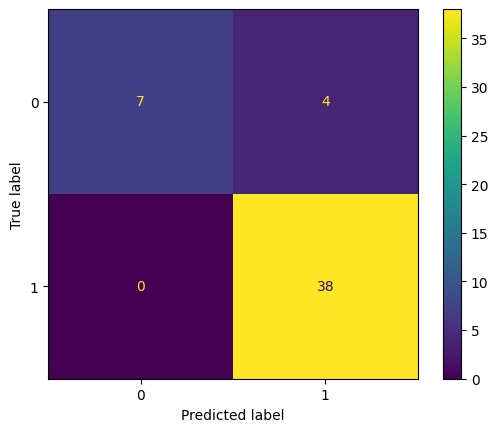

In [218]:
confusion_matrix = metrics.confusion_matrix(Y_test,y_predict) 

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1]) 

cm_display.plot() 
plt.show() 

**Interpreting confuion matrix for the final model:**

Total number of test set instances: 49

Total number of TP: 38

Total number of FP: 4

Total number of TN: 7

Total number of FN: 0

Precision for the final model = TP/(TP+FP)= 38/42=0.9047

Accuracy for the final model = (TP+TN)/(TP+TN+FP+FN)= 38+7/49=0.918367

Recall for the final model= TP/(TP+FN)= 38/38=1

The precision, accuracy and recall scores calculated by `sklearn` is the same as the calculations above. But the value of weighted metrics are slightly different.

In [236]:
#model evaluation
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score, f1_score, accuracy_score
from sklearn .metrics import roc_auc_score #AUC-ROC Curve
print("Precision:", precision_score(Y_test,y_predict))
print("Recall:", recall_score(Y_test,y_predict))
print("Accuracy:", accuracy_score(Y_test,y_predict))
# print('F1 score:', f1_score(Y_test,y_predict, average="weighted")) 
                            

Precision: 0.9047619047619048
Recall: 1.0
Accuracy: 0.9183673469387755


In [220]:
precision_score_final=precision_score(Y_test,y_predict, average="weighted")
recall_score_final=recall_score(Y_test,y_predict, average="weighted")
accuracy_score_final=accuracy_score(Y_test,y_predict)
F1_score_final=f1_score(Y_test,y_predict, average="weighted")
auc_final=roc_auc_score(Y_test,y_predict)

In [221]:
# Create a DataFrame for evaluation scores comparing baseline model (see section 3) with the final model
evaluation_scores = {
    "Metric": ["Precision", "Recall", "Accuracy", "F1 Score","AUC" ],
    "Final Model": [precision_score_final, recall_score_final, accuracy_score_final, F1_score_final,auc_final],
    "Baseline Model": [precision_score_baseline, recall_score_baseline, accuracy_score_baseline, F1_score_baseline,auc_baseline]
}

In [222]:
auc_final

0.8181818181818181

In [223]:
# Create the DataFrame
df_evaluation = pd.DataFrame(evaluation_scores)

# Print the DataFrame
print(df_evaluation)

      Metric  Final Model  Baseline Model
0  Precision     0.926142        0.909824
1     Recall     0.918367        0.897959
2   Accuracy     0.918367        0.897959
3   F1 Score     0.911338        0.886103
4        AUC     0.818182        0.772727
